In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cluster counts:
 Cluster
1    59
2    57
3    54
0    29
Name: count, dtype: int64
Davies-Bouldin Index: 1.1725229823917782
Average Silhouette Score: 0.3736
Number of clusters formed: 4


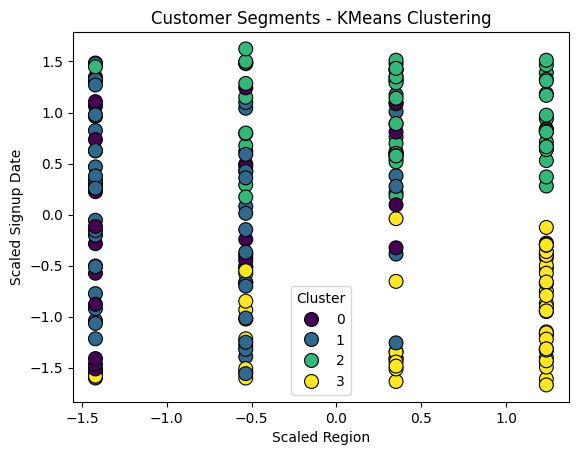

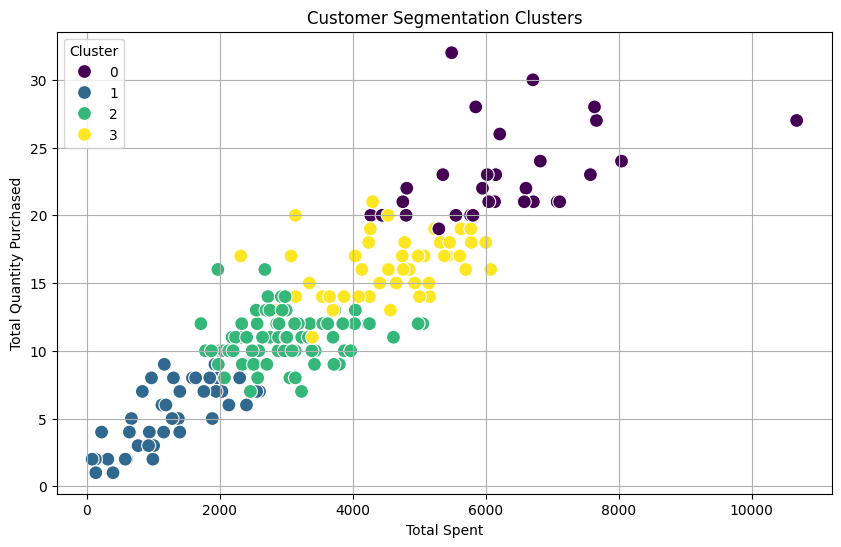

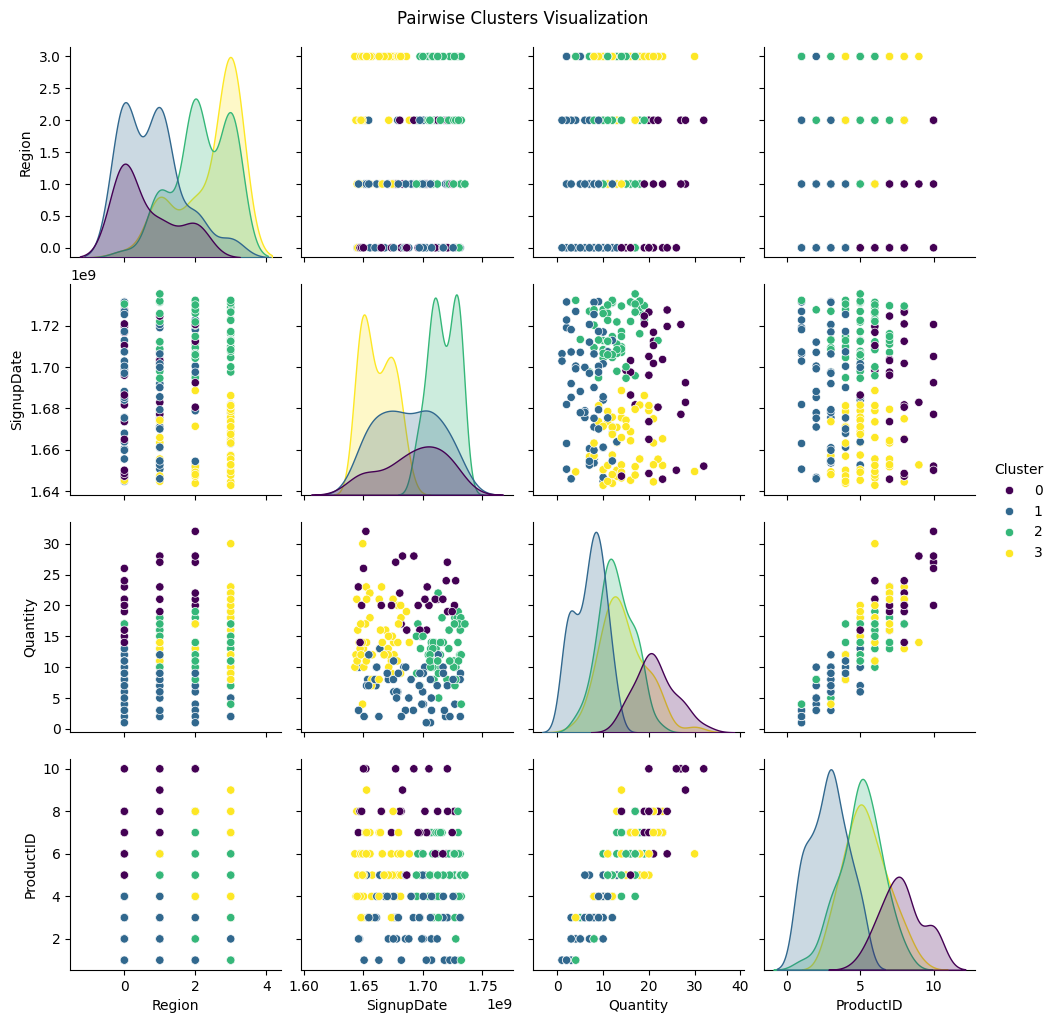

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv("/content/drive/MyDrive/Customers.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Transactions.csv")

# Preprocessing for customers
# Encode 'Region' using Label Encoding
le = LabelEncoder()
customers['Region'] = le.fit_transform(customers['Region'])

# Convert 'SignupDate' to Unix timestamp
customers['SignupDate'] = pd.to_datetime(customers['SignupDate']).apply(lambda x: x.timestamp())

# Merge customer and transaction data
merged_data = transactions.merge(customers, on='CustomerID')

# Aggregate transaction data to get total quantity spent per customer
customer_transaction_data = merged_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'ProductID': 'nunique'
}).reset_index()

# Combine the profile and transaction data for clustering
features = pd.merge(customers[['CustomerID', 'Region', 'SignupDate']], customer_transaction_data, on='CustomerID')

# Select features for clustering
clustering_features = features[['Region', 'SignupDate', 'Quantity', 'ProductID']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust clusters between 2 and 10
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataset
features['Cluster'] = clusters

# Display cluster counts
print("Cluster counts:\n", features['Cluster'].value_counts())

# Calculate Davies-Bouldin Index for evaluation
db_index = davies_bouldin_score(scaled_features, clusters)
print("Davies-Bouldin Index:", db_index)
print(f"Average Silhouette Score: {silhouette_avg:.4f}")

# Display number of cluster results
print(f"Number of clusters formed: {optimal_clusters}")

# Visualize clusters
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=features['Cluster'],
    palette='viridis',
    s=100, edgecolor='black'
)
plt.title("Customer Segments - KMeans Clustering")
plt.xlabel("Scaled Region")
plt.ylabel("Scaled Signup Date")
plt.legend(title="Cluster")
plt.show()

# Another additional clusters visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_profiles, x='TotalSpent', y='TotalQuantity', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Spent')
plt.ylabel('Total Quantity Purchased')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Optionally, use pairplot for multidimensional visualization of clusters
sns.pairplot(features, hue='Cluster', palette='viridis')
plt.suptitle("Pairwise Clusters Visualization", y=1.02)
plt.show()
